- Tanguy Malandain
- Hugo Deplagne
- Pierre Litoux
- Param Dave

# Reaffectation

### Import modules

In [114]:
import numpy as np
import pandas as pd

### Load dataframe

In [115]:
df = pd.read_csv("data/clusters.csv")
df.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102,cluster_usage,cluster_attitude
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,0.0,...,1,2,1.0,1,1,24,0,4,1,2
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,0.0,...,1,2,1.0,4,1,50,0,1,4,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,0.0,...,2,1,1.0,3,2,37,1,3,4,2
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,0.0,...,1,2,1.0,5,3,63,0,2,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,0.0,1.0,...,2,1,1.0,3,1,44,1,3,3,2


In [116]:
df_usage = df.iloc[:, 0:30].copy()
df_usage["cluster"] = df["cluster_usage"]
#df_attitude = df.loc[:, df.columns != 'cluster_usage']

In [117]:
df_usage.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,0.0,...,2,2,2,2,2,2,2,2,2,1
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,0.0,...,4,4,4,4,4,4,4,4,4,4
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,0.0,...,4,4,4,4,4,4,4,4,4,4
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,0.0,...,4,4,5,5,5,5,5,4,4,0
4,5,MET20_1869308,0.812315,0,1,0,0,2,0.0,1.0,...,4,4,4,4,4,4,4,4,4,3


In [118]:
df_attitude = df.iloc[:, list(range(3)) + list(range(30, 67))].copy()
df_attitude["cluster"] = df["cluster_attitude"]

In [119]:
df_attitude.head()

,cle,Respondent_ID,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,...,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,MET20_999999996,2.501255,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,MET20_98888888,0.722914,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,1
2,3,MET20_1978307,1.039611,3,2,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2
3,4,MET20_1302078,0.976590,1,2,2,2,3,2,3,...,1,2,3,3,3,2,2,1,2,2
4,5,MET20_1869308,0.812315,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


## Feature selection

### For usage

In [120]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
def feature_importance(df):
    data = df.iloc[:, 3:-1] 
    
    # Standardize the data
    data = data.apply(pd.to_numeric, errors='ignore')
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(data)

    # Train a simple model (Random Forest) to get feature importance
    model = RandomForestClassifier(random_state=42)
    model.fit(data_standardized, df['cluster'])

    # Get feature importances
    feature_importances = model.feature_importances_


    # Visualize feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data.columns, y=feature_importances, palette='viridis')
    plt.title('Feature Importances across Clusters')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    return feature_importances


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

/var/folders/ls/rtj1jkm558v2pscccssq3dcm0000gq/T/ipykernel_56876/3550682514.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.columns, y=feature_importances, palette='viridis')


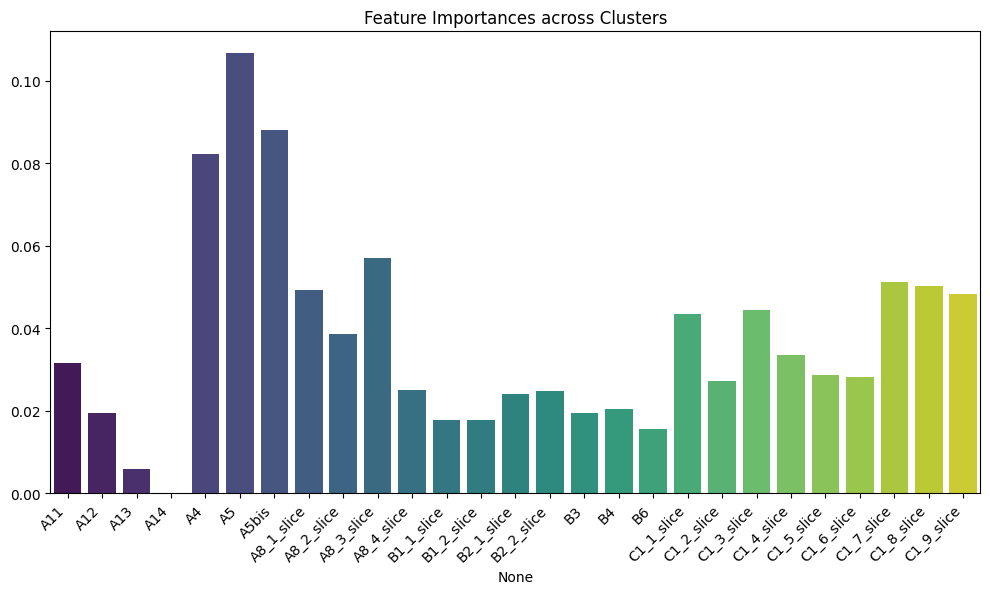

In [121]:
importances = feature_importance(df_usage)

In [122]:
def select_top_k_features(importances, feature_names, k=5):
    """
    Selects the top k features based on their importances.

    Parameters:
    - importances: List of feature importances (floats)
    - feature_names: List of feature names corresponding to the importances
    - k: Number of top features to select (default is 5)

    Returns:
    - List of top k feature names
    """
    # Zip the feature names and importances, then sort based on importances
    sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

    # Extract the top k feature names
    top_feature_names = [feature[0] for feature in sorted_features[:k]]

    return top_feature_names

# Example Usage:
# Assuming importances is a list of floats and feature_names is a list of feature names
# Replace 5 with the desired number of top features to select
top_k_features = select_top_k_features(importances, X.columns, k=10)
print("Top Features:", top_k_features)


Top Features: ['A5', 'A5bis', 'A4', 'A8_3_slice', 'C1_7_slice', 'C1_8_slice', 'A8_1_slice', 'C1_9_slice', 'C1_3_slice', 'C1_1_slice']


In [123]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate(df, selected_features, viz=True):
    """
    Train and evaluate an XGBoost classifier on the specified features.

    Parameters:
    - df: DataFrame with features and labels
    - selected_features: List of feature names to use for classification

    Returns:
    - Confusion matrix and accuracy score
    """
    # Temporarily filter out the FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        # Extract features and labels
        X = df[selected_features]
        y = df['cluster']  # Assuming 'cluster' is the name of the label column

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize XGBoost classifier
        model = XGBClassifier()

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        confusion_mat = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        if viz:
            print("\nAccuracy Score:", accuracy)

            # Plot the confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=model.classes_, yticklabels=model.classes_)
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()

        return accuracy


Accuracy Score: 0.959


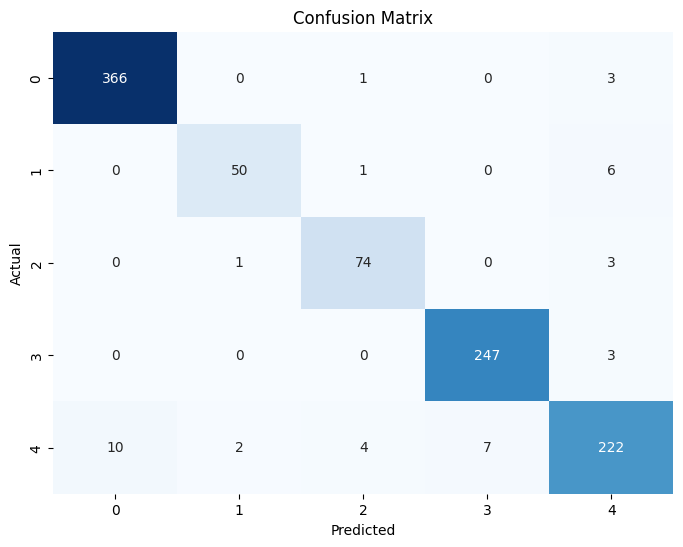

In [124]:
accuracy = train_and_evaluate(df_usage, X.columns)

In [125]:
def plot_accuracy(df, importances, all_feature):
    accuracies = []
    for k in range(1, len(all_feature) + 1):
        k_features = select_top_k_features(importances, all_feature, k)
        accuracies.append(train_and_evaluate(df, k_features, viz=False))

    x_axes = range(1, len(accuracies) + 1)

    plt.plot(x_axes, accuracies, marker='o')
    plt.xlabel('Number of questions')
    plt.ylabel('Accuracy')
    plt.title('Plot accuracies for each number of questions from most to least important')
    plt.show()

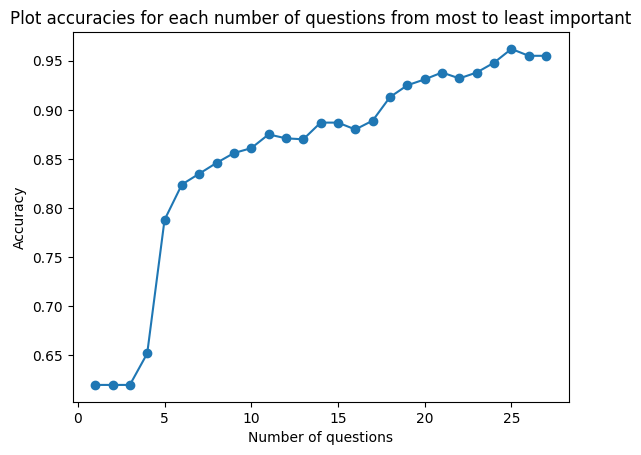

In [132]:
plot_accuracy(df_usage, importances, df_usage.iloc[:, 3:-1].columns)